### Imports

In [139]:
# Data analysis and data wrangling
import numpy as np
import pandas as pd

# Other
from IPython.display import Image
import configparser
import subprocess
import warnings
import pprint
import time
import os

### Prepare Principal Directory

In [101]:
def prepare_directory_work(end_directory: str='notebooks'):
    # Current path
    curr_dir = os.path.dirname (os.path.realpath ("__file__")) 
    
    if curr_dir.endswith(end_directory):
        os.chdir('..')
        return curr_dir
    
    return f'Current working directory: {curr_dir}'

In [102]:
prepare_directory_work(end_directory='notebooks')

'Current working directory: /home/campos/projetos/artificial_inteligence/data-science/flow_analysis'

### Cell Format

In [123]:
# Guarantees visualization inside the jupyter
%matplotlib inline

# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# Format the data os all table (float_format 3)
pd.set_option('display.float_format', '{:.6}'.format)

# Print xxxx rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Supress unnecessary warnings so that presentation looks clean
warnings.filterwarnings('ignore')

# Graph style
sns.set(style='dark',font=font_family, palette='deep')

# Pretty print
pp = pprint.PrettyPrinter(indent=4)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load Data

In [161]:
%%time

df_census = pd.read_csv('data/raw/census.csv', 
                       encoding='utf8',
                       sep=',',
                       verbose=True)

Tokenization took: 46.11 ms
Type conversion took: 33.23 ms
Parser memory cleanup took: 0.00 ms
CPU times: user 92.8 ms, sys: 196 µs, total: 93 ms
Wall time: 92.1 ms


In [162]:
%%time

df_enroll = pd.read_csv('data/raw/enrollments.csv', 
                       encoding='utf8',
                       sep=',',
                       verbose=True)

Tokenization took: 1.26 ms
Type conversion took: 2.12 ms
Parser memory cleanup took: 0.01 ms
CPU times: user 9.09 ms, sys: 0 ns, total: 9.09 ms
Wall time: 7.78 ms


In [163]:
%%time

df_callcenter = pd.read_csv('data/raw/callcenter_marketing.csv', 
                       encoding='utf8',
                       sep=',')
df_callcenter = df_callcenter.fillna('handler')

CPU times: user 128 ms, sys: 8.31 ms, total: 136 ms
Wall time: 135 ms


## Feature Seletcion


### Filtering
- Encontrar Correlation

### Embedded Methods
- Decision tree fazem o feature selection automaticamente, por exemplo a cada nodo ela decide qual a melhor feature para fazer o split usando a informação da entropia. Então, é possível retornar uma feature importance


O que fazer com as fature importance?
Remover as menos importanantes?



https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b


https://scikit-learn.org/stable/modules/feature_selection.html

## Interaction Features

Exemplo (imóveis)
Digamos que já tivéssemos um recurso chamado 'num_schools' , ou seja, o número de escolas dentro de 5 milhas de uma propriedade.
Digamos que também tenhamos o recurso 'median_school' , ou seja, a pontuação mediana de qualidade dessas escolas.
No entanto, podemos suspeitar que o que é realmente importante é  ter muitas opções de escola, mas apenas se elas forem boas.
Bem, para capturar essa interação, poderíamos criar um novo recurso  'school_score'  =  'num_schools'  x  'median_school'

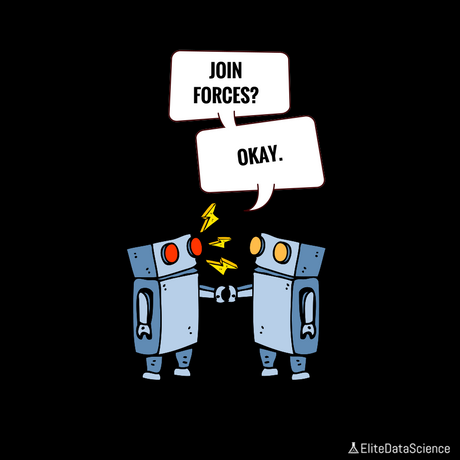

In [21]:
# hide_code
Image('reports/Joining-Forces.png')

## Features Selection

Lista de verificação para features:
    
    
1. Você tem conhecimento de domínio? Se sim, crie um conjunto melhor de recursos ad hoc ””

2. Suas características são compatíveis? Se não, considere normalizá-los.

3. Você suspeita de interdependência de recursos? Se sim, expanda seu conjunto de recursos construindo recursos ou produtos de recursos conjuntivos, tanto quanto os recursos do computador permitem.

4. Você precisa remover as variáveis ​​de entrada (por exemplo, por razões de custo, velocidade ou compreensão de dados)? Se não, construa recursos disjuntivos ou somas ponderadas de recurso

5. Você precisa avaliar os recursos individualmente (por exemplo, para entender a influência deles no sistema ou porque o número deles é tão grande que você precisa fazer o primeiro filtro)? Se sim, use um método de classificação de variáveis; mais, faça de qualquer maneira para obter resultados básicos.

6. Você precisa de um preditor? Se não, pare

7. Você suspeita que seus dados estão “sujos” (tem alguns padrões de entrada sem significado e / ou saídas ruidosas ou rótulos de classes errados)? Se sim, detecte os exemplos de outlier usando as principais variáveis ​​de classificação obtidas na etapa 5 como representação; verifique e / ou descarte-os.

8. Você sabe o que tentar primeiro? Se não, use um preditor linear. Use um método de seleção forward com o método “probe” como um critério de parada ou use o método 0-norm embedded para comparação, seguindo a classificação da etapa 5, construa uma sequência de preditores da mesma natureza usando subconjuntos crescentes de recursos. Você pode combinar ou melhorar o desempenho com um subconjunto menor? Se sim, tente um preditor não linear com esse subconjunto.

9. Você tem novas ideias, tempo, recursos computacionais e exemplos suficientes? Se sim, compare vários métodos de seleção de recursos, incluindo sua nova ideia, coeficientes de correlação, seleção reversa e métodos incorporados. Use preditores lineares e não lineares. Selecione a melhor abordagem com a seleção de modelos

10. Você quer uma solução estável (para melhorar o desempenho e / ou entendimento)? Se sim, sub-especifique seus dados e refaça sua análise para vários “bootstrap”.

## Feature Importance

- Which features provide the most predictive power?

 - O principal objetivo de ter uma avaliação de feature_importance é para detectar problemas.
 - As feature_importance são analisadas encima de alguma modelo. 

In [15]:
def get_feature_importance_df(feature_importances,
                              column_names, 
                              top_n=25):
    """Get feature importance data frame.
 
    Parameters
    ----------
    feature_importances : numpy ndarray
        Feature importances computed by an ensemble 
            model like random forest or boosting
    column_names : array-like
        Names of the columns in the same order as feature 
            importances
    top_n : integer
        Number of top features
 
    Returns
    -------
    df : a Pandas data frame"""
     
    imp_dict = dict(zip(column_names, feature_importances))
    
    # get name features sroted
    top_features = sorted(imp_dict, key=imp_dict.get, reverse=True)[0:top_n]
    
    # get values
    top_importances = [imp_dict[feature] for feature in top_features]
    
    # create dataframe with feature_importance
    df = pd.DataFrame(data={'feature': top_features, 'importance': top_importances})
    return df

In [16]:
# create model
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators=150, # numbers tree
                           max_depth=8,
                           min_samples_leaf=4,
                           max_features=0.2, # each tree utility 20% in the features
                           n_jobs=-1,
                           random_state=42)

In [17]:
# trainning model
rf.fit(train.drop(['target'], axis=1), train.target)
features = train.drop(['target'], axis=1).columns.values
print("---Traing Done---")

---Traing Done---


In [18]:
# get trained model (rf) and avalible the feature_importance
feature_importance = get_feature_importance_df(rf.feature_importances_, features)

# print 25 feature_importance in the rf randomForest
feature_importance

,feature,importance
0,ps_car_13,0.13
1,ps_ind_05_cat,0.07
2,ps_reg_03,0.07
3,ps_ind_17_bin,0.06
4,ps_ind_03,0.04
5,ps_reg_02,0.04
6,id,0.04
7,ps_car_07_cat,0.03
8,ps_car_04_cat,0.03
9,ps_car_14,0.03


[Text(0,0.5,'Importance'),
 Text(0.5,0,'Variable name'),
 Text(0.5,1,'Variable importances')]

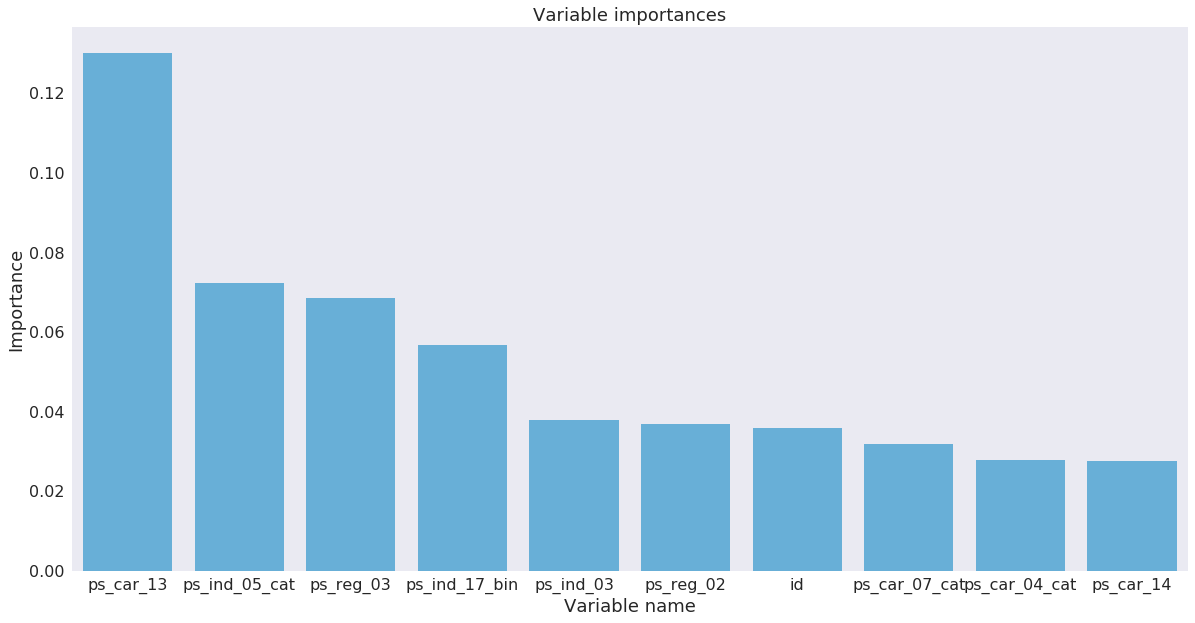

In [19]:
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
sns.barplot(data=feature_importance[:10],x="feature",y="importance",ax=ax,color=default_color,)
ax.set(xlabel='Variable name', ylabel='Importance',title="Variable importances")

#### Other form calculate feature importance

In [20]:
# TODO: Extract the feature importances using .feature_importances_ 
importances = rf.feature_importances_

importances

array([0.03590883, 0.01711062, 0.01345553, 0.03776644, 0.01624582,
       0.07227804, 0.01909058, 0.02110627, 0.00497738, 0.00334355,
       0.00031269, 0.00066332, 0.00125337, 0.00084412, 0.00194773,
       0.02529927, 0.01347381, 0.0566334 , 0.00194042, 0.01713683,
       0.03683138, 0.06851308, 0.02387888, 0.00696493, 0.0197124 ,
       0.02776735, 0.00598132, 0.01295914, 0.03174285, 0.00315014,
       0.00976308, 0.00145528, 0.01571261, 0.00646674, 0.02526253,
       0.13013779, 0.02742899, 0.01849723, 0.00994316, 0.01122144,
       0.0110875 , 0.00744363, 0.01010283, 0.00825177, 0.01064557,
       0.01032604, 0.01052008, 0.01723965, 0.01556056, 0.00838557,
       0.01083305, 0.01354515, 0.00119982, 0.00250698, 0.00243319,
       0.00247408, 0.00204217, 0.00122402])

## References:
- https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/
- http://jmlr.csail.mit.edu/papers/volume3/guyon03a/guyon03a.pdf
- https://towardsdatascience.com/understanding-feature-engineering-part-1-continuous-numeric-data-da4e47099a7b